---
#### ***Name : Ashuwin P***
#### ***Reg. No : 3122 22 5002 013***
#### ***Course : UIT2722 ~ Bio Inspired Optimization Techniques***
#### ***Topic : Genetic Algorithm - Pattern Recognition***
#### ***Last Update : 06 November 2024***
---

In [13]:
import numpy as np
import random
import matplotlib.pyplot as plt
import math

In [14]:
class Chromosome:
    def __init__(self, chromosome):
        self.chromosome = chromosome
        self.fitness = None
        self.prob = None

    @staticmethod
    def random_chromosome(size_):
        return np.random.choice([0, 255], size=size_)
    
    
    def manhattan_distance(self, other):
        return np.sum(np.abs(other - self.chromosome))
    
    def __lt__(self, other):
        return self.fitness < other.fitness

In [15]:
class GeneticAlgorithm:
    def __init__(self, solution, population):
        self.population = population
        self.size = len(self.population)
        self.solution = solution

    def evaluation(self):
        for chromosome in self.population:
            manhattan_distance = chromosome.manhattan_distance(self.solution)
            chromosome.fitness = 1 / (1 + manhattan_distance)

        if len(self.population) > self.size:
            self.population = sorted(self.population, key=lambda x: x.fitness, reverse=True)[:self.size]
        return
    
    def build_roulette_wheel(self):
        total_fitness = sum(chromosome.fitness for chromosome in self.population)
        for chromosome in self.population:
            chromosome.prob = chromosome.fitness / total_fitness

        cumulative_distribution = []
        cdf = 0
        for chromosome in self.population:
            cdf += chromosome.prob
            cumulative_distribution.append(cdf)
        
        return cumulative_distribution
    
    def selection(self, cumulative_distribution):
        ch1, ch2 = None, None
        def select():
            n = random.random()
            for i, chromosome in enumerate(self.population):
                if n <= cumulative_distribution[i]:
                    return chromosome
        
        parent1 = select()
        parent2 = select()
        while np.array_equal(parent2.chromosome, parent1.chromosome):
            parent2 = select()
        return parent1, parent2
    
    def crossover(self, parent1, parent2):
        # Generate a random crossover point
        crossover_point = random.randint(1, len(parent1.chromosome) - 1)
        
        offspring_chromosome = np.concatenate(
            (parent1.chromosome[:crossover_point], parent2.chromosome[crossover_point:])
        )
        
        offspring = Chromosome(offspring_chromosome)
        return offspring

    
    def mutation(self, offspring):
        num_mutation = 5
        m = len(offspring.chromosome)
        for i in range(num_mutation):
            idx = random.randint(0, m-1)
            if offspring.chromosome[idx] == 0 :
                offspring.chromosome[idx] = 255
            else:
                offspring.chromosome[idx] = 0
        return offspring
    
    def best_value(self):
        return max(chromosome.fitness for chromosome in self.population)

In [16]:
def Run_GA(solution, population, num_iter):
    GA = GeneticAlgorithm(solution, population)
    values = []
    for _ in range(num_iter):
        GA.evaluation()
        if _ == num_iter - 1:
            break
        values.append(GA.best_value())
        cdf = GA.build_roulette_wheel()
        for k in range(GA.size//2):
            p1, p2 = GA.selection(cdf)
            offspring = GA.crossover(p1, p2)
            mutated_offspring = GA.mutation(offspring)
            GA.population.append(mutated_offspring)
    return GA.population, values

In [ ]:
import cv2
def preprocess_image(image_path):
    src_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    original_shape = src_image.shape
    _, bw_image = cv2.threshold(src_image, 127, 255, cv2.THRESH_BINARY)
    flattened_image = bw_image.flatten()
    return flattened_image, original_shape

In [ ]:
src_image_path = r".\zero1.jpg"

In [19]:
image, osize = preprocess_image(src_image_path)

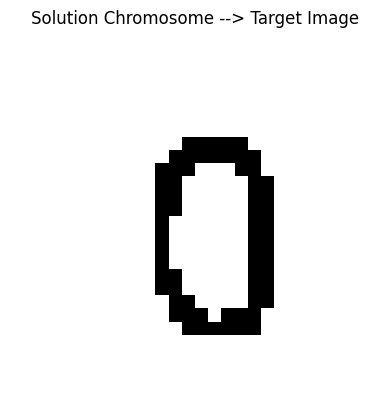

In [20]:
plt.title("Solution Chromosome --> Target Image")
plt.imshow(image.reshape(osize), cmap='gray')
plt.axis('off')
plt.show()

In [21]:
population_size = 12
population = []
for _ in range (population_size):
    random_chromosome = Chromosome.random_chromosome(image.shape)
    population.append(Chromosome(random_chromosome))

In [22]:
solutions, logs = Run_GA(image, population, 75000)

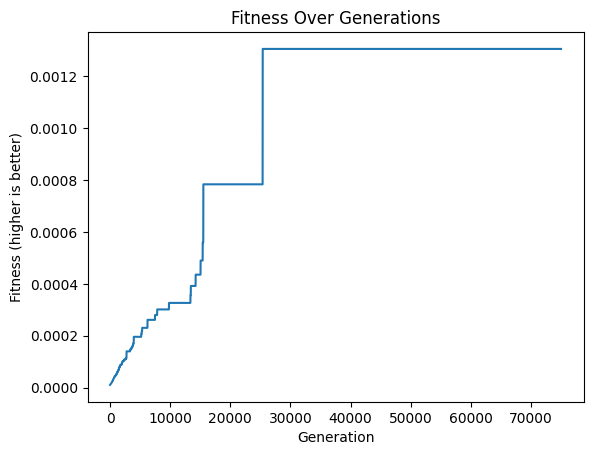

In [23]:
# Plot fitness over generations
plt.plot(logs)
plt.title("Fitness Over Generations")
plt.xlabel("Generation")
plt.ylabel("Fitness (higher is better)")
plt.show()

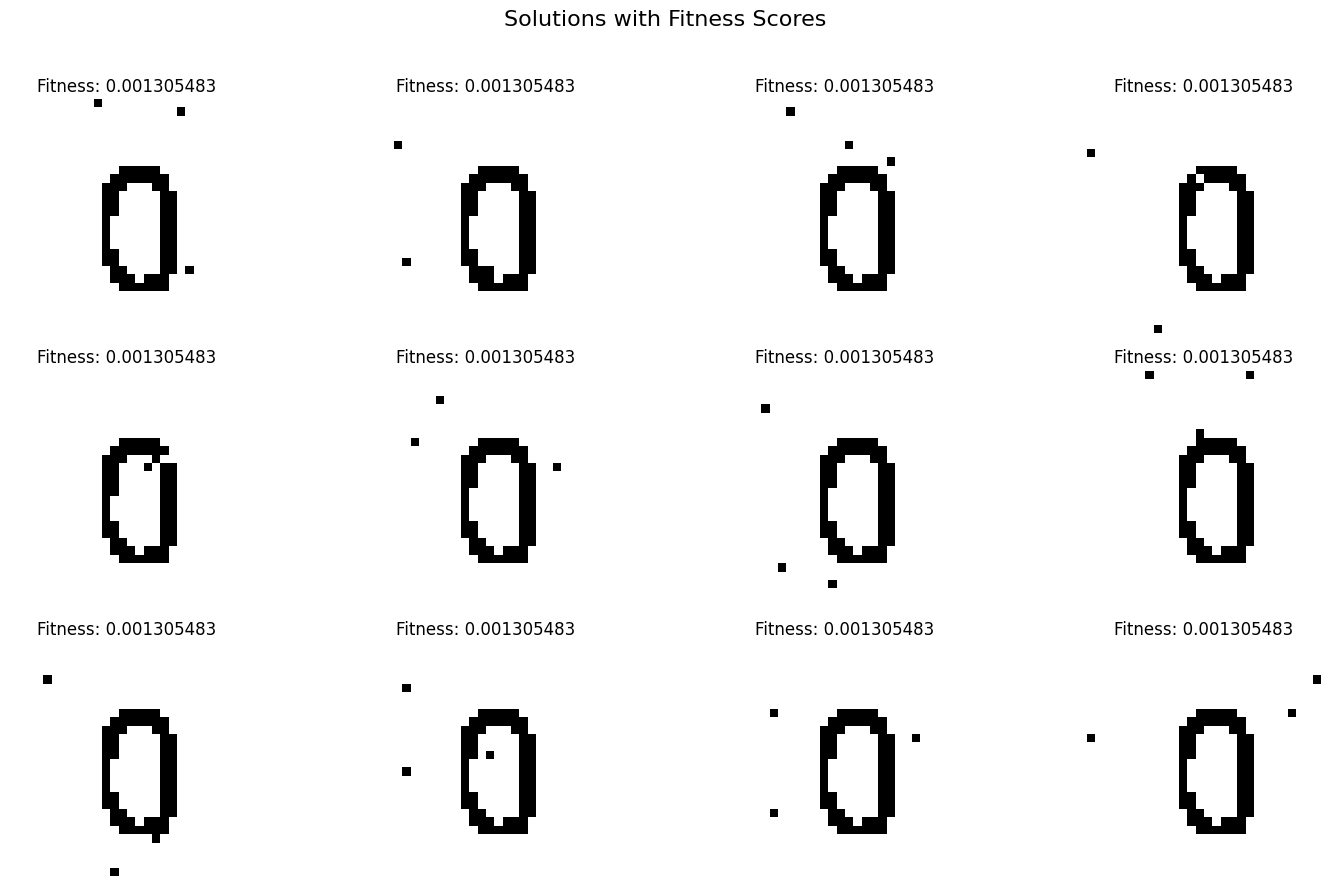

In [ ]:
# Determine grid size for displaying images
num_images = len(solutions)
cols = 4
rows = math.ceil(num_images / cols)

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 3))
fig.suptitle("Solutions with Fitness Scores", fontsize=16)

# Flatten axes array for easy indexing
axes = axes.flatten()

for i, img in enumerate(solutions):
    axes[i].imshow(img.chromosome.reshape(osize), cmap='gray')
    axes[i].set_title(f"Fitness: {img.fitness:.9f}")
    axes[i].axis('off')

# Hide any remaining empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()